# 官方教程 - 10分钟入门pandas

> 教程译自[10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/version/0.18.0/10min.html)，有删改，[点击直达最新文档地址](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

```{admonition} 在线刷题
:class: seealso

检查 or 强化 `Pandas` 数据分析操作？<a href="https://www.heywhale.com/mw/project/6146c0318447b8001769ff20" target="_blank">👉在线体验「Pandas进阶修炼300题」</a>
```

```{note} 
本页面代码可以[在线编辑、执行](../指引/在线执行.md)！

首先导入 Python 数据处理中常用的三个库，如果没有需要提前使用 `pip` 安装

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

注：本教程基于Pandas0.18.0版本，因版本不同可能有些代码无法成功执行，请自行查阅解决办法

## 创建数据

使用pd.Series创建Series对象

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过numpy的array数据来创建DataFrame对象

In [4]:
dates = pd.date_range('20130101', periods=6)

In [5]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))

In [7]:
df

,A,B,C,D
2013-01-01,1.634952,0.344012,-1.500467,0.825656
2013-01-02,1.142162,-1.240680,-0.989647,-0.038731
2013-01-03,0.740258,-0.456965,0.047300,0.098805
2013-01-04,1.183470,-0.320496,-0.065134,-0.673914
2013-01-05,-0.232936,-1.797379,0.670386,-0.500322
2013-01-06,2.106164,1.708895,0.008713,0.854128


通过字典创建DataFrame对象

In [8]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })

In [9]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [11]:
dir(df2)

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '_

## 数据查看

基本方法，务必掌握，更多相关查看数据的方法可以参与[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics)

下面分别是查看数据的顶部和尾部的方法

In [12]:
df.head()

,A,B,C,D
2013-01-01,1.634952,0.344012,-1.500467,0.825656
2013-01-02,1.142162,-1.240680,-0.989647,-0.038731
2013-01-03,0.740258,-0.456965,0.047300,0.098805
2013-01-04,1.183470,-0.320496,-0.065134,-0.673914
2013-01-05,-0.232936,-1.797379,0.670386,-0.500322


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,1.183470,-0.320496,-0.065134,-0.673914
2013-01-05,-0.232936,-1.797379,0.670386,-0.500322
2013-01-06,2.106164,1.708895,0.008713,0.854128


查看DataFrame对象的索引，列名，数据信息

In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [16]:
df.values

array([[ 1.63495195,  0.34401201, -1.50046675,  0.82565639],
       [ 1.14216225, -1.2406799 , -0.98964656, -0.03873073],
       [ 0.74025807, -0.45696486,  0.04730002,  0.09880548],
       [ 1.18346999, -0.3204963 , -0.06513432, -0.67391432],
       [-0.23293638, -1.79737915,  0.67038637, -0.50032219],
       [ 2.10616386,  1.70889477,  0.00871283,  0.85412766]])

描述性统计

In [17]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,1.095678,-0.293769,-0.304808,0.094270
std,0.801661,1.233066,0.791117,0.643998
min,-0.232936,-1.797379,-1.500467,-0.673914
25%,0.840734,-1.044751,-0.758518,-0.384924
50%,1.162816,-0.388731,-0.028211,0.030037
75%,1.522081,0.177885,0.037653,0.643944
max,2.106164,1.708895,0.670386,0.854128


数据转置

In [18]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.634952,1.142162,0.740258,1.183470,-0.232936,2.106164
B,0.344012,-1.240680,-0.456965,-0.320496,-1.797379,1.708895
C,-1.500467,-0.989647,0.047300,-0.065134,0.670386,0.008713
D,0.825656,-0.038731,0.098805,-0.673914,-0.500322,0.854128


根据列名排序

In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.825656,-1.500467,0.344012,1.634952
2013-01-02,-0.038731,-0.989647,-1.240680,1.142162
2013-01-03,0.098805,0.047300,-0.456965,0.740258
2013-01-04,-0.673914,-0.065134,-0.320496,1.183470
2013-01-05,-0.500322,0.670386,-1.797379,-0.232936
2013-01-06,0.854128,0.008713,1.708895,2.106164


根据B列数值排序

In [20]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.232936,-1.797379,0.670386,-0.500322
2013-01-02,1.142162,-1.240680,-0.989647,-0.038731
2013-01-03,0.740258,-0.456965,0.047300,0.098805
2013-01-04,1.183470,-0.320496,-0.065134,-0.673914
2013-01-01,1.634952,0.344012,-1.500467,0.825656
2013-01-06,2.106164,1.708895,0.008713,0.854128


## 数据选取

官方建议使用优化的熊猫数据访问方法`.at，.iat，.loc`和`.iloc`，部分较早的pandas版本可以使用`.ix`

这些选取函数的使用需要熟练掌握，我也曾写过相关文章帮助理解

- [5分钟学会Pandas中iloc/loc/ix区别](https://mp.weixin.qq.com/s/5xJ-VLaHCV9qX2AMNOLRtw)

### 使用\[\]选取数据

选取单列数据，等效于`df.A`:

In [21]:
df['A']

2013-01-01    1.634952
2013-01-02    1.142162
2013-01-03    0.740258
2013-01-04    1.183470
2013-01-05   -0.232936
2013-01-06    2.106164
Freq: D, Name: A, dtype: float64

按行选取数据，使用[]

In [22]:
df[0:3]

,A,B,C,D
2013-01-01,1.634952,0.344012,-1.500467,0.825656
2013-01-02,1.142162,-1.240680,-0.989647,-0.038731
2013-01-03,0.740258,-0.456965,0.047300,0.098805


In [23]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.142162,-1.240680,-0.989647,-0.038731
2013-01-03,0.740258,-0.456965,0.047300,0.098805
2013-01-04,1.183470,-0.320496,-0.065134,-0.673914


### 通过标签选取数据

In [24]:
df.loc[dates[0]]

A    1.634952
B    0.344012
C   -1.500467
D    0.825656
Name: 2013-01-01 00:00:00, dtype: float64

In [25]:
df.loc[:,['A','B']]

,A,B
2013-01-01,1.634952,0.344012
2013-01-02,1.142162,-1.240680
2013-01-03,0.740258,-0.456965
2013-01-04,1.183470,-0.320496
2013-01-05,-0.232936,-1.797379
2013-01-06,2.106164,1.708895


In [26]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,1.142162,-1.240680
2013-01-03,0.740258,-0.456965
2013-01-04,1.183470,-0.320496


In [27]:
df.loc['20130102',['A','B']]

A    1.142162
B   -1.240680
Name: 2013-01-02 00:00:00, dtype: float64

In [28]:
df.loc[dates[0],'A']

1.6349519465229627

In [29]:
df.at[dates[0],'A']

1.6349519465229627

### 通过位置选取数据

In [30]:
df.iloc[3]

A    1.183470
B   -0.320496
C   -0.065134
D   -0.673914
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.183470,-0.320496
2013-01-05,-0.232936,-1.797379


In [32]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.142162,-0.989647
2013-01-03,0.740258,0.047300
2013-01-05,-0.232936,0.670386


In [33]:
df.iloc[1:3]

,A,B,C,D
2013-01-02,1.142162,-1.240680,-0.989647,-0.038731
2013-01-03,0.740258,-0.456965,0.047300,0.098805


In [34]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.344012,-1.500467
2013-01-02,-1.240680,-0.989647
2013-01-03,-0.456965,0.047300
2013-01-04,-0.320496,-0.065134
2013-01-05,-1.797379,0.670386
2013-01-06,1.708895,0.008713


In [35]:
df.iloc[1, 1]

-1.2406798979581912

In [36]:
df.iat[1, 1]

-1.2406798979581912

### 使用布尔索引 

In [37]:
df[df.A>0]

,A,B,C,D
2013-01-01,1.634952,0.344012,-1.500467,0.825656
2013-01-02,1.142162,-1.240680,-0.989647,-0.038731
2013-01-03,0.740258,-0.456965,0.047300,0.098805
2013-01-04,1.183470,-0.320496,-0.065134,-0.673914
2013-01-06,2.106164,1.708895,0.008713,0.854128


In [38]:
df[df>0]

,A,B,C,D
2013-01-01,1.634952,0.344012,NaN,0.825656
2013-01-02,1.142162,NaN,NaN,NaN
2013-01-03,0.740258,NaN,0.047300,0.098805
2013-01-04,1.183470,NaN,NaN,NaN
2013-01-05,NaN,NaN,0.670386,NaN
2013-01-06,2.106164,1.708895,0.008713,0.854128


In [39]:
df2 = df.copy()

In [40]:
df2['E'] = ['one', 'one','two','three','four','three']

In [41]:
df2

,A,B,C,D,E
2013-01-01,1.634952,0.344012,-1.500467,0.825656,one
2013-01-02,1.142162,-1.240680,-0.989647,-0.038731,one
2013-01-03,0.740258,-0.456965,0.047300,0.098805,two
2013-01-04,1.183470,-0.320496,-0.065134,-0.673914,three
2013-01-05,-0.232936,-1.797379,0.670386,-0.500322,four
2013-01-06,2.106164,1.708895,0.008713,0.854128,three


In [42]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.740258,-0.456965,0.047300,0.098805,two
2013-01-05,-0.232936,-1.797379,0.670386,-0.500322,four


## 缺失值处理

**reindex**

Pandas中使用`np.nan`来表示缺失值，可以使用`reindex`更改/添加/删除指定轴上的索引

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [44]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [45]:
df1

,A,B,C,D,E
2013-01-01,1.634952,0.344012,-1.500467,0.825656,1.0
2013-01-02,1.142162,-1.240680,-0.989647,-0.038731,1.0
2013-01-03,0.740258,-0.456965,0.047300,0.098805,NaN
2013-01-04,1.183470,-0.320496,-0.065134,-0.673914,NaN


### 删除缺失值
舍弃含有NaN的行

In [46]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,1.634952,0.344012,-1.500467,0.825656,1.0
2013-01-02,1.142162,-1.240680,-0.989647,-0.038731,1.0


### 填充缺失值
填充缺失数据

In [47]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,1.634952,0.344012,-1.500467,0.825656,1.0
2013-01-02,1.142162,-1.240680,-0.989647,-0.038731,1.0
2013-01-03,0.740258,-0.456965,0.047300,0.098805,5.0
2013-01-04,1.183470,-0.320496,-0.065134,-0.673914,5.0


In [48]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## 常用操作

在我的[Pandas120题](https://mp.weixin.qq.com/s/xgqmjTt4nxHJJZCE7acDhw)系列中有很多关于Pandas常用操作介绍！

欢迎微信搜索公众号【早起Python】关注

后台回复pandas获取相关习题！

### 统计

在进行统计操作时需要排除缺失值！

**描述性统计👇**

纵向求均值

In [49]:
df.mean()

A    1.095678
B   -0.293769
C   -0.304808
D    0.094270
dtype: float64

横向求均值

In [50]:
df.mean(1)

2013-01-01    0.326038
2013-01-02   -0.281724
2013-01-03    0.107350
2013-01-04    0.030981
2013-01-05   -0.465063
2013-01-06    1.169475
Freq: D, dtype: float64

In [51]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)

In [52]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [53]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.259742,-1.456965,-0.952700,-0.901195
2013-01-04,-1.816530,-3.320496,-3.065134,-3.673914
2013-01-05,-5.232936,-6.797379,-4.329614,-5.500322
2013-01-06,NaN,NaN,NaN,NaN


### Apply函数

In [54]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,1.634952,0.344012,-1.500467,0.825656
2013-01-02,2.777114,-0.896668,-2.490113,0.786926
2013-01-03,3.517372,-1.353633,-2.442813,0.885731
2013-01-04,4.700842,-1.674129,-2.507948,0.211817
2013-01-05,4.467906,-3.471508,-1.837561,-0.288505
2013-01-06,6.574070,-1.762613,-1.828848,0.565622


In [55]:
df.apply(lambda x: x.max() - x.min())

A    2.339100
B    3.506274
C    2.170853
D    1.528042
dtype: float64

### value_counts()

文档中为`Histogramming`，但示例就是`.value_counts()`的使用

In [56]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [57]:
s

0    3
1    1
2    3
3    4
4    2
5    0
6    6
7    6
8    5
9    0
dtype: int64

In [58]:
s.value_counts()

6    2
3    2
0    2
5    1
4    1
2    1
1    1
dtype: int64

### 字符串方法

In [59]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])

In [60]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 数据合并

### Concat

在连接/合并类型操作的情况下，pandas提供了各种功能，可以轻松地将Series和DataFrame对象与各种用于索引和关系代数功能的集合逻辑组合在一起。

In [61]:
df = pd.DataFrame(np.random.randn(10, 4))

In [62]:
df

,0,1,2,3
0,-0.187048,-0.613105,0.037453,3.573681
1,0.412490,-0.152813,1.637011,0.350667
2,-0.338074,0.438260,-0.765221,0.780382
3,-1.382818,-1.565832,0.712837,0.367577
4,0.654716,0.488564,-1.661541,-0.711852
5,0.629807,0.579440,-0.594273,0.114206
6,-0.176187,-0.954843,1.125997,0.768102
7,0.047836,1.301465,1.025279,0.152521
8,0.428410,0.875813,1.192308,1.481351
9,1.809456,0.184695,-0.403809,-0.595719


In [63]:
pieces = [df[:3], df[3:6], df[7:]]

In [64]:
pd.concat(pieces)

,0,1,2,3
0,-0.187048,-0.613105,0.037453,3.573681
1,0.412490,-0.152813,1.637011,0.350667
2,-0.338074,0.438260,-0.765221,0.780382
3,-1.382818,-1.565832,0.712837,0.367577
4,0.654716,0.488564,-1.661541,-0.711852
5,0.629807,0.579440,-0.594273,0.114206
7,0.047836,1.301465,1.025279,0.152521
8,0.428410,0.875813,1.192308,1.481351
9,1.809456,0.184695,-0.403809,-0.595719


**注意**

将列添加到DataFrame相对较快。 

但是，添加一行需要一个副本，并且可能浪费时间

我们建议将预构建的记录列表传递给DataFrame构造函数，而不是通过迭代地将记录追加到其来构建DataFrame

### Join

In [65]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

In [66]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [67]:
left

,key,lval
0,foo,1
1,foo,2


In [68]:
right

,key,rval
0,foo,4
1,foo,5


In [69]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [70]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])

In [71]:
df

,A,B,C,D
0,0.595056,1.589137,0.679702,-0.137154
1,-1.273668,-1.119854,0.233978,-0.702164
2,-0.703594,0.944802,-0.990445,-0.996773
3,-1.159654,1.026671,0.595532,0.546077
4,-0.117547,-0.270969,0.729609,-2.308545
5,1.172194,-1.748565,-0.051934,-0.579306
6,0.683596,-0.787381,0.893180,0.754044
7,0.798641,0.208679,-1.971340,0.737727


In [72]:
s = df.iloc[3]

In [73]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.595056,1.589137,0.679702,-0.137154
1,-1.273668,-1.119854,0.233978,-0.702164
2,-0.703594,0.944802,-0.990445,-0.996773
3,-1.159654,1.026671,0.595532,0.546077
4,-0.117547,-0.270969,0.729609,-2.308545
5,1.172194,-1.748565,-0.051934,-0.579306
6,0.683596,-0.787381,0.893180,0.754044
7,0.798641,0.208679,-1.971340,0.737727
8,-1.159654,1.026671,0.595532,0.546077


## 数据分组

**数据分组**是指涉及以下一个或多个步骤的过程：

- 根据某些条件将数据分成几组

- 对每个组进行独立的操作

- 对结果进行合并

更多操作可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby)

In [74]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.136532,0.169020
1,bar,one,0.745504,0.595110
2,foo,two,-0.940560,-1.491006
3,bar,three,1.812596,0.694972
4,foo,two,0.722139,-0.315394
5,bar,two,-0.421488,-0.509184
6,foo,one,1.251556,1.000441
7,foo,three,0.022834,1.068191


In [75]:
df.groupby('A').sum()

,C,D
A,,
bar,2.136612,0.780898
foo,2.192501,0.431252


In [76]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.745504  0.595110
    three  1.812596  0.694972
    two   -0.421488 -0.509184
foo one    2.388088  1.169461
    three  0.022834  1.068191
    two   -0.218421 -1.806400

## 数据重塑

### 数据堆叠
可以进行数据压缩

In [77]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))

In [78]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [79]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [80]:
df2 = df[:4]

In [81]:
df2

A         B
first second                    
bar   one     0.037999  0.374382
      two    -0.137685  1.055119
baz   one    -0.405635  0.050070
      two     0.448682 -1.185321

In [82]:
stacked = df2.stack()

In [83]:
stacked

first  second   
bar    one     A    0.037999
               B    0.374382
       two     A   -0.137685
               B    1.055119
baz    one     A   -0.405635
               B    0.050070
       two     A    0.448682
               B   -1.185321
dtype: float64

stack()的反向操作是unstack()，默认情况下，它会将最后一层数据进行unstack():

In [84]:
stacked.unstack()

A         B
first second                    
bar   one     0.037999  0.374382
      two    -0.137685  1.055119
baz   one    -0.405635  0.050070
      two     0.448682 -1.185321

In [85]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.037999 -0.137685
      B  0.374382  1.055119
baz   A -0.405635  0.448682
      B  0.050070 -1.185321

In [86]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.037999 -0.405635
       B  0.374382  0.050070
two    A -0.137685  0.448682
       B  1.055119 -1.185321

### 数据透视表

In [87]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})

In [88]:
df

,A,B,C,D,E
0,one,A,foo,-1.188091,-0.171735
1,one,B,foo,0.151558,-1.067456
2,two,C,foo,1.151940,-1.042052
3,three,A,bar,-0.324650,-1.697813
4,one,B,bar,0.111947,0.047054
5,one,C,bar,0.865963,-0.203293
6,two,A,foo,1.359646,-1.164001
7,three,B,foo,0.485124,-1.319532
8,one,C,foo,-0.768076,-0.761393
9,one,A,bar,1.029523,-1.399677


In [89]:
df.pivot_table(values='D', index=['A', 'B'], columns='C')

C             bar       foo
A     B                    
one   A  1.029523 -1.188091
      B  0.111947  0.151558
      C  0.865963 -0.768076
three A -0.324650       NaN
      B       NaN  0.485124
      C  0.335745       NaN
two   A       NaN  1.359646
      B  1.185462       NaN
      C       NaN  1.151940

## 时间序列

对于在频率转换期间执行重采样操作(例如，将秒数据转换为5分钟数据)，pandas具有简单、强大和高效的功能。这在金融应用中非常常见，但不仅限于此。 参见[时间序列](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries)部分。

时区表示

In [90]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

In [91]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [92]:
ts.resample('5Min').sum()

2012-01-01    24979
Freq: 5T, dtype: int64

In [93]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

In [94]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [95]:
ts

2012-03-06    0.449412
2012-03-07   -1.200724
2012-03-08   -1.818233
2012-03-09    1.345431
2012-03-10    1.844884
Freq: D, dtype: float64

In [96]:
ts_utc = ts.tz_localize('UTC')

In [97]:
ts_utc

2012-03-06 00:00:00+00:00    0.449412
2012-03-07 00:00:00+00:00   -1.200724
2012-03-08 00:00:00+00:00   -1.818233
2012-03-09 00:00:00+00:00    1.345431
2012-03-10 00:00:00+00:00    1.844884
Freq: D, dtype: float64

时区转换

In [98]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.449412
2012-03-06 19:00:00-05:00   -1.200724
2012-03-07 19:00:00-05:00   -1.818233
2012-03-08 19:00:00-05:00    1.345431
2012-03-09 19:00:00-05:00    1.844884
Freq: D, dtype: float64

在时间跨度表示之间进行转换

In [99]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

In [100]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [101]:
ts

2012-01-31    0.657311
2012-02-29   -0.327377
2012-03-31   -0.589083
2012-04-30    0.772233
2012-05-31   -0.146111
Freq: M, dtype: float64

In [102]:
ps = ts.to_period()

In [103]:
ps

2012-01    0.657311
2012-02   -0.327377
2012-03   -0.589083
2012-04    0.772233
2012-05   -0.146111
Freq: M, dtype: float64

In [104]:
ps.to_timestamp()

2012-01-01    0.657311
2012-02-01   -0.327377
2012-03-01   -0.589083
2012-04-01    0.772233
2012-05-01   -0.146111
Freq: MS, dtype: float64

在周期和时间戳之间转换可以使用一些方便的算术函数。 

在以下示例中，我们将以11月结束的年度的季度频率转换为季度结束后的月末的上午9点：

In [105]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

In [106]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [107]:
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [108]:
ts.head()

1990-03-01 09:00    1.346074
1990-06-01 09:00    0.054833
1990-09-01 09:00    1.368322
1990-12-01 09:00   -0.205745
1991-03-01 09:00    0.234554
Freq: H, dtype: float64

事实上，常用有关时间序列的操作远超过上方的官方示例，简单来说与日期有关的操作从创建到转换pandas都能很好的完成！

## 灵活的使用分类数据

Pandas可以在一个DataFrame中包含分类数据。有关完整文档，请参阅分类介绍和API文档。

In [109]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [110]:
df['grade'] = df['raw_grade'].astype("category")

In [111]:
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

将类别重命名为更有意义的名称(`Series.cat.categories()`)

In [112]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

重新排序类别，并同时添加缺少的类别(在有缺失的情况下，string .cat()下的方法返回一个新的系列)。

In [113]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

In [114]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [115]:
df.sort_values(by='grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [116]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## 数据可视化

In [117]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [118]:
ts.head()

2000-01-01    0.037357
2000-01-02    0.438814
2000-01-03   -0.442540
2000-01-04   -1.277619
2000-01-05   -0.332405
Freq: D, dtype: float64

In [119]:
ts = ts.cumsum() #累加

在Pandas中可以使用`.plot()`直接绘图，支持多种图形和自定义选项点击可以查阅[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html#plotting)

<AxesSubplot:>

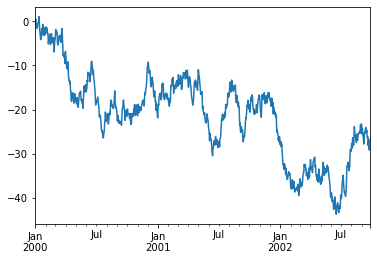

In [120]:
ts.plot()

In [121]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 

In [122]:
df = df.cumsum()

使用`plt`绘图，具体参数设置可以查阅matplotlib官方文档

<Figure size 432x288 with 0 Axes>

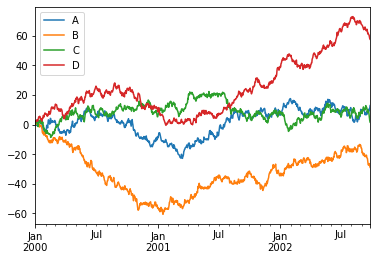

In [123]:
plt.figure(); df.plot(); plt.legend(loc='best')

## 导入导出数据

**将数据写入`csv`，如果有中文需要注意编码**

In [124]:
# df.to_csv('foo.csv')

从`csv`中读取数据

In [125]:
# pd.read_csv('foo.csv').head()

将数据导出为`hdf`格式

In [126]:
# df.to_hdf('foo.h5','df')

从`hdf`文件中读取数据前五行

In [127]:
# pd.read_hdf('foo.h5','df').head()

将数据保存为`xlsx`格式

In [128]:
# df.to_excel('foo.xlsx', sheet_name='Sheet1')

从`xlsx`格式中按照指定要求读取sheet1中数据

In [129]:
# pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()